# **Telco Customer Churn**

### Muhammad Reza Hamzah

 copyright@2024

Abstact 

[Telco Churn](https://databoks.katadata.co.id/datapublish/2022/06/02/sektor-informasi-dan-komunikasi-masih-tumbuh-pesat-pada-kuartal-i-2022#:~:text=Berdasarkan%20data%20Badan%20Pusat%20Statistik,pertumbuhan%20sektor%20transportasi%20dan%20pergudangan.)

Peningkatan persaingan di industri layanan telekomunikasi menuntut perhatian khusus dari penyedia layanan untuk mempertahankan basis pelanggan mereka. Saat ini, tantangan utama yang dihadapi adalah menjaga kesetiaan pelanggan dan mencegah beralihnya pelanggan ke pesaing.

Dalam upaya menghadapi dinamika pasar, perusahaan perlu memahami perilaku pelanggan secara lebih mendalam. Identifikasi pelanggan yang berpotensi untuk beralih (churn) dan pelanggan yang tetap setia (no churn) menjadi kunci dalam mengantisipasi kerugian potensial.

Dataset ini mencerminkan profil pelanggan di industri telekomunikasi, mencakup baik pelanggan yang telah beralih (churn) maupun yang masih setia menggunakan layanan (no churn). Churn terjadi ketika pelanggan memutuskan untuk meninggalkan penyedia layanan.

Dengan fokus pada analisis data, perusahaan dapat mengembangkan strategi yang lebih cerdas untuk mempertahankan pelanggan dan meningkatkan kepuasan mereka. Pengelompokan pelanggan menjadi dua kategori utama, yaitu pelanggan yang bertahan (no churn) dan pelanggan yang beralih (churn), membantu perusahaan untuk mengambil langkah-langkah preventif yang efektif dan mengoptimalkan retensi pelanggan.


**Probelm Statement :**

Dalam upaya memperoleh pelanggan, perusahaan telah melibatkan sejumlah strategi, upaya, dan waktu untuk membangun hubungan. Sayangnya, kehilangan pelanggan setelah usaha besar ini tentu menjadi suatu kerugian yang patut dihindari.

Oleh karena itu, menjaga dan meningkatkan pertumbuhan perusahaan menjadi suatu prioritas utama. Mengamankan pelanggan yang sudah diperoleh agar tidak beralih menjadi hal krusial untuk memastikan tingkat pertumbuhan yang optimal. Salah satu pendekatan yang dapat diambil untuk mengendalikan tingkat churn adalah melalui prediksi pelanggan yang berpotensi beralih, sehingga perusahaan dapat menyesuaikan strategi yang diperlukan untuk mencegah kehilangan pelanggan tersebut.

Menyadari pentingnya meramalkan target pelanggan yang tepat, perusahaan dapat merinci metode yang lebih spesifik untuk mencegah churn dan menjaga keberlanjutan pertumbuhan. Dengan memahami perilaku pelanggan dan mengimplementasikan langkah-langkah pencegahan yang sesuai, perusahaan dapat menjaga konsistensi dalam pertumbuhan bisnisnya serta meminimalkan risiko penurunan churn rate.

**Goals :**

Dalam menghadapi tantangan tersebut, perusahaan bersikeras untuk mengembangkan kemampuan prediktif guna meramalkan apakah seorang pelanggan akan cenderung beralih atau tetap menggunakan layanan. Hal ini penting untuk memungkinkan perusahaan mengambil tindakan pencegahan yang diperlukan, mengingat menggantikan pelanggan yang telah berhenti bisa menjadi tugas yang sulit dan mahal.

Tak hanya itu, perusahaan juga berkeinginan untuk memahami faktor-faktor yang memengaruhi keputusan pelanggan untuk beralih atau tetap. Dengan mengetahui akar penyebab churn dan faktor-faktor yang membuat pelanggan tetap setia, perusahaan dapat merancang insentif atau promosi khusus yang dapat mempertahankan pelanggan yang memiliki kecenderungan untuk berhenti. Selain itu, langkah-langkah ini juga dapat digunakan untuk menjaga kepuasan pelanggan yang masih aktif, meningkatkan retensi, dan merawat hubungan yang sudah terjalin.

# Data Understanding

- Dependents (Tanggungan):Menunjukkan apakah pelanggan memiliki tanggungan (anggota keluarga atau orang lain yang bergantung pada layanan yang sama).

- Tenure (Lama Berlangganan): Menunjukkan berapa lama pelanggan telah menjadi pelanggan perusahaan, umumnya diukur dalam bulan atau tahun.

- OnlineSecurity (Keamanan Online):Menunjukkan apakah pelanggan menggunakan layanan keamanan online untuk melindungi aktivitas online mereka.

- OnlineBackup (Pencadangan Online):Menunjukkan apakah pelanggan menggunakan layanan pencadangan online untuk melindungi data mereka.

- InternetService (Layanan Internet): Menunjukkan jenis layanan internet yang digunakan oleh pelanggan, seperti DSL, kabel, atau serat optik.

- DeviceProtection (Perlindungan Perangkat): Menunjukkan apakah pelanggan menggunakan layanan perlindungan perangkat untuk melindungi perangkat mereka.

- TechSupport (Dukungan Teknis): Menunjukkan apakah pelanggan menggunakan layanan dukungan teknis untuk bantuan dan pemecahan masalah.

- Contract (Kontrak): Menunjukkan jenis kontrak yang dimiliki pelanggan, seperti bulanan atau kontrak jangka panjang.

- PaperlessBilling (Tagihan Tanpa Kertas): Menunjukkan apakah pelanggan menerima tagihan dalam bentuk elektronik tanpa kertas atau tidak.

- MonthlyCharges (Biaya Bulanan): Menunjukkan jumlah biaya bulanan yang dikenakan kepada pelanggan.

- Churn (Pergantian):Menunjukkan apakah pelanggan telah berhenti menggunakan layanan (churn) atau masih aktif.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import scikit-learn modules
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer


# Import imbalanced-learn modules
from imblearn.pipeline import Pipeline as ImbPipeline

# Import other necessary libraries
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


## Raw Data Telco Customer Churn

In [3]:
tcc = pd.read_csv('data_telco_customer_churn.csv')
tcc.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [4]:
print(f"Dataset Dimension: **{tcc.shape[0]}** rows,  **{tcc.shape[1]}** columns")

Dataset Dimension: **4930** rows,  **11** columns


In [5]:
tcc.describe(include="all")

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [6]:
tcc.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [7]:
display(tcc.duplicated().sum())

77

In [8]:
tcc.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

<Figure size 1000x600 with 0 Axes>

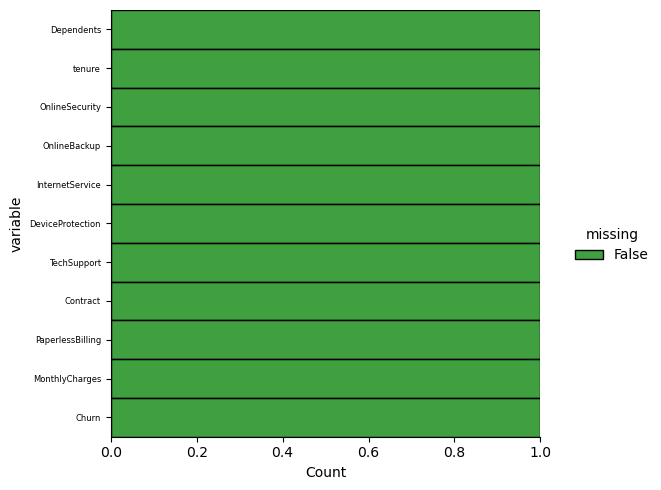

In [9]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=tcc.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette=["green","red"]
)

dms.set_yticklabels(size = 6)

plt.show()

Berdasarkan hasil visualisasi di atas, dapat dengan yakin disimpulkan bahwa dataset yang akan kita analisis tidak mengandung nilai yang hilang (missing value). Oleh karena itu, tidak diperlukan tindakan khusus terkait penanganan masalah nilai yang hilang. Analisis lebih lanjut dapat dilakukan tanpa perlu memperhatikan atau mengisi nilai yang hilang pada dataset, mempermudah proses pengolahan data dan interpretasi hasil.

**Data Outliers**

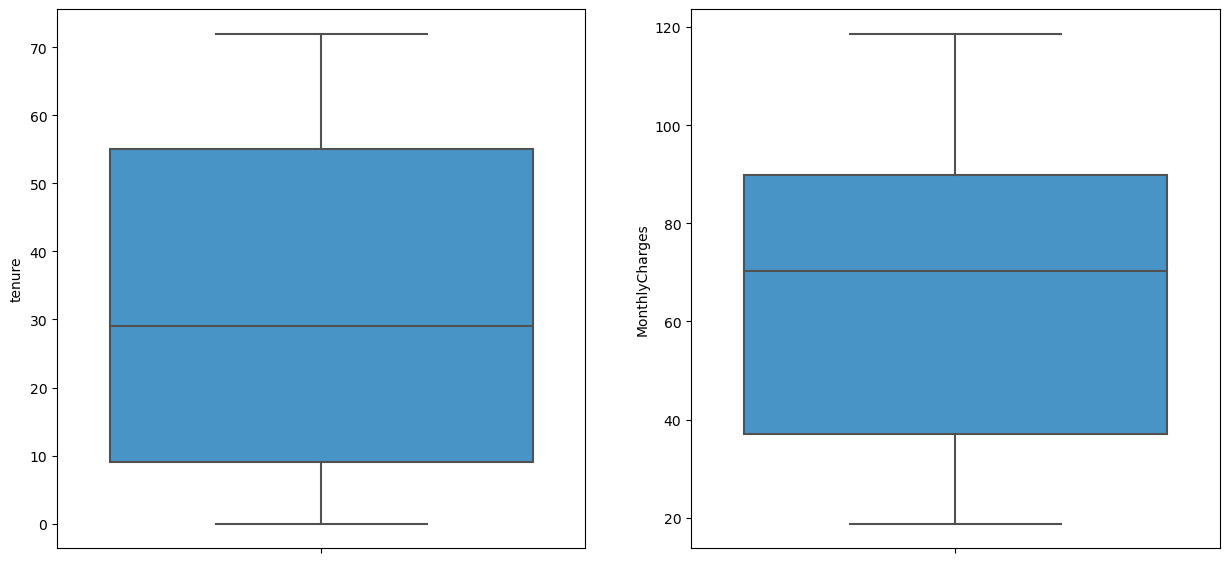

In [10]:
featuresNum = ['tenure', 'MonthlyCharges']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=tcc[featuresNum[i]], color="#3498db")

plt.show()

Dari Barplot diatas terlihat tidak ada outliers pada dataset Telco Customer Churn yang kita olah 

### Categorical Features Distribution

In [11]:
tcc.describe(include=['object']).T

,count,unique,top,freq
Dependents,4930,2,No,3446
OnlineSecurity,4930,3,No,2445
OnlineBackup,4930,3,No,2172
InternetService,4930,3,Fiber optic,2172
DeviceProtection,4930,3,No,2186
TechSupport,4930,3,No,2467
Contract,4930,3,Month-to-month,2721
PaperlessBilling,4930,2,Yes,2957
Churn,4930,2,No,3614


**Insight :**

- Terdapat 9 kolom dengan tipe data categorical, di mana 8 di antaranya digunakan sebagai fitur dan 1 sebagai target, yaitu Churn.
- Frekuensi kategori No Churn lebih dominan dibandingkan dengan kategori Churn, dengan jumlah 3614 dari total 4930 pengguna.
- Terlihat tren penggunaan PaperlessBilling lebih tinggi, mencerminkan pergeseran ke preferensi pembayaran digital, meskipun sejumlah pelanggan (4930 - 2957) masih memilih metode pembayaran kertas.
- Mode kontrak terbanyak yang dipilih oleh pelanggan adalah Month-to-month.
- Frekuensi tertinggi pada kategori InternetService adalah layanan Fiber Optic.
- Tampaknya pelanggan cenderung tidak menggunakan fitur tambahan seperti OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport pada layanan mereka.
- Mayoritas pelanggan tidak memiliki Dependents atau tanggungan.

## Pengecekan Imbalance

In [12]:
tcc1 = pd.crosstab(index=tcc['Churn'], columns='count').reset_index().sort_values(by='count')
tcc1

col_0,Churn,count
1,Yes,1316
0,No,3614


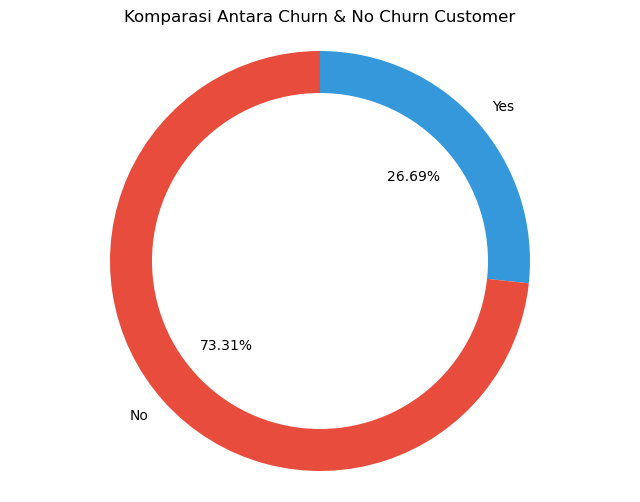

In [13]:
plt.figure(figsize=(8,6))
plt.pie(tcc1['count'],
        labels=tcc1['Churn'],
        autopct='%.2f%%',
        counterclock=False,
        startangle=90,
        colors=['#3498db', '#e74c3c'])
fig = plt.gcf()
center_circle = plt.Circle((0,0), 0.80, fc='white')
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.title('Komparasi Antara Churn & No Churn Customer');

for column in tcc.select_dtypes(include='object').columns:  # Memilih kolom dengan tipe data 'object'
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='Churn', data=tcc, palette='pastel')
    plt.title(f'Barplot {column} dengan Hue Churn')
    plt.show()

# Data Spliting 

In [14]:
tcc.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [15]:
label_encoder = LabelEncoder()
tcc['Churn'] = label_encoder.fit_transform(tcc['Churn'])

In [16]:

x = tcc[['tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'Contract',
       'PaperlessBilling', 'MonthlyCharges']]
y = tcc['Churn']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    x,
    y,
    stratify= y,
    random_state=2024,
    test_size=0.2
)

# Preprocessing

**resampling**

In [17]:
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import NearMiss,TomekLinks,ClusterCentroids
from imblearn.combine import SMOTEENN,SMOTETomek

np.random.seed(42)

resampler = TomekLinks() 


**encoding**

In [18]:
one_hot = ['PaperlessBilling']
binary = ['OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','Contract']
# Definisikan transformer untuk kolom kategorikal
categorical_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), one_hot),
    ('binary', BinaryEncoder(), binary),
], remainder='passthrough')

# Model Benchmarking

In [19]:
# Random Forest pipeline with resampling
random_forest_pipeline_resample = ImbPipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('resampler', resampler),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Decision Tree pipeline with resampling
decision_tree_pipeline_resample = ImbPipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('resampler', resampler),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# AdaBoost pipeline with resampling
adaboost_pipeline_resample = ImbPipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('resampler', resampler),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# SVM pipeline with resampling
svm_pipeline_resample = ImbPipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('resampler', resampler),
    ('classifier', SVC())
])

# Combine models in one DataFrame
model_names_resample = ['Random Forest (Resample)', 'Decision Tree (Resample)', 'AdaBoost (Resample)', 'SVM (Resample)']
models_resample = [random_forest_pipeline_resample, decision_tree_pipeline_resample, adaboost_pipeline_resample, svm_pipeline_resample]

results_resample = []

# Perform cross-validation for each model
for model_name, model in zip(model_names_resample, models_resample):
    # Compute weighted F1 score using cross_val_score
    cv_scores = cross_val_score(model, Xtrain, Ytrain, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_weighted')
    
    # Append mean and standard deviation of the scores to results_resample list
    results_resample.append({
        'Model': model_name,
        'Mean_Weighted_F1_Score': cv_scores.mean(),
        'Std_Dev': cv_scores.std()
    })

# Results in DataFrame
results_df_resample = pd.DataFrame(results_resample)

In [20]:
results_df_resample

,Model,Mean_Weighted_F1_Score,Std_Dev
0,Random Forest (Resample),0.784965,0.009468
1,Decision Tree (Resample),0.738186,0.009458
2,AdaBoost (Resample),0.788942,0.010805
3,SVM (Resample),0.774810,0.014167


Dari hasil ini, terlihat bahwa model AdaBoost (Resample) mencapai Mean Weighted F1 Score tertinggi, yaitu 0.788942, dengan deviasi standar sebesar 0.010805. Ini menunjukkan bahwa model ini memiliki kinerja yang stabil dan konsisten. Sementara itu, model Decision Tree (Resample) memiliki Mean Weighted F1 Score yang lebih rendah dan deviasi standar yang serupa, menunjukkan kinerja yang kurang stabil dibandingkan dengan model lainnya.

# Hyperparameter Tunning

In [21]:
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Hyperparameter grid for Adaboost
adaboost_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0]
}

# Define the pipelines for Random Forest and Adaboost
random_forest_pipeline = ImbPipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('resampler', resampler),
    ('classifier', RandomForestClassifier(random_state=42))
])

adaboost_pipeline = ImbPipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('resampler', resampler),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Combine the parameter grids for Random Forest and Adaboost
param_grids = [
    (random_forest_pipeline, rf_param_grid),
    (adaboost_pipeline, adaboost_param_grid)
]

# Perform GridSearchCV for each model
best_params = {}
for pipeline, param_grid in param_grids:
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(Xtrain, Ytrain)
    best_params[type(pipeline.named_steps['classifier']).__name__] = grid_search.best_params_
    print(f"Best Hyperparameters for {type(pipeline.named_steps['classifier']).__name__}: {grid_search.best_params_}")

# Access the best hyperparameters for each model
best_rf_params = best_params['RandomForestClassifier']
best_adaboost_params = best_params['AdaBoostClassifier']

Best Hyperparameters for RandomForestClassifier: {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Best Hyperparameters for AdaBoostClassifier: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}


RandomForestClassifier optimal dengan hyperparameter sebagai berikut: menggunakan bootstrap, membatasi kedalaman pohon (max_depth) sebesar 10, dengan nilai minimum sampel daun (min_samples_leaf) dan pemisahan sampel (min_samples_split) masing-masing sebesar 4 dan 10. Jumlah estimator (n_estimators) yang digunakan adalah 50.

Sementara itu, AdaBoostClassifier mencapai hasil terbaik dengan learning rate sebesar 0.1 dan 200 estimator. Penyetelan hyperparameter ini bertujuan untuk mencapai keseimbangan antara akurasi dan mencegah overfitting atau underfitting. Dengan konfigurasi ini, keduanya diharapkan memberikan prediksi yang lebih akurat dan andal dalam aplikasi praktis.

# Best Model based on Xtest

In [22]:
# Define the RandomForestClassifier and AdaBoostClassifier with the best hyperparameters

best_rf_params = {
    'n_estimators': 50,
    'max_depth': 10,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'bootstrap': True
}

best_adaboost_params = {
    'n_estimators': 200,
    'learning_rate': 0.1
}

# Define the RandomForestClassifier and AdaBoostClassifier with the best hyperparameters
best_rf_model = ImbPipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('resampler', resampler),
    ('classifier', RandomForestClassifier(**best_rf_params, random_state=42))
])

best_adaboost_model = ImbPipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('resampler', resampler),
    ('classifier', AdaBoostClassifier(**best_adaboost_params, random_state=42))
])


# Fit the models on the training data
best_rf_model.fit(Xtrain, Ytrain)
best_adaboost_model.fit(Xtrain, Ytrain)

# Make predictions on the test data
rf_predictions = best_rf_model.predict(Xtest)
adaboost_predictions = best_adaboost_model.predict(Xtest)

# Calculate the weighted F1 score for the RandomForestClassifier and AdaBoostClassifier
weighted_f1_rf = f1_score(Ytest, rf_predictions, average='weighted')
weighted_f1_adaboost = f1_score(Ytest, adaboost_predictions, average='weighted')

# Display the weighted F1 scores
print(f"Weighted F1 Score for RandomForestClassifier: {weighted_f1_rf}")
print(f"Weighted F1 Score for AdaBoostClassifier: {weighted_f1_adaboost}")

Weighted F1 Score for RandomForestClassifier: 0.7891507807102264
Weighted F1 Score for AdaBoostClassifier: 0.7921527813398151


## Conclusion & Recommendation
### Conclusion

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

final_report = classification_report(Ytest, adaboost_predictions)
print('Classification Report Tuned AdaBoostClassifier : \n', final_report)

Classification Report Tuned AdaBoostClassifier : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       723
           1       0.62      0.59      0.60       263

    accuracy                           0.79       986
   macro avg       0.74      0.73      0.73       986
weighted avg       0.79      0.79      0.79       986



In [24]:
final_report = classification_report(Ytest, rf_predictions)
print('Classification Report Tuned RandomForestClassifier : \n', final_report)

Classification Report Tuned RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       723
           1       0.61      0.59      0.60       263

    accuracy                           0.79       986
   macro avg       0.73      0.73      0.73       986
weighted avg       0.79      0.79      0.79       986



<Axes: >

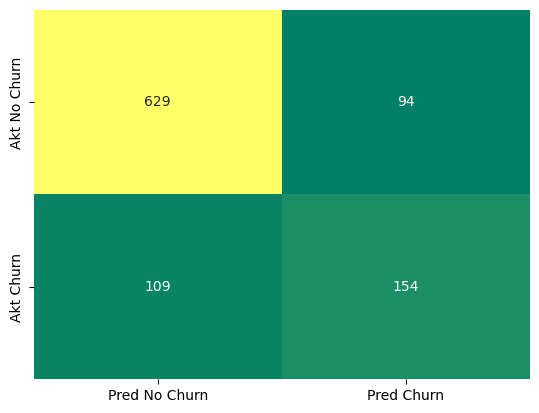

In [25]:
from sklearn.metrics import confusion_matrix

final_cm = confusion_matrix(Ytest, adaboost_predictions, labels=[0, 1])
df_final_cm = pd.DataFrame(data=final_cm, columns=['Pred No Churn', 'Pred Churn'], index=['Akt No Churn', 'Akt Churn'])
sns.heatmap(df_final_cm, cbar=False, annot=True, fmt='d', cmap='summer')

<Axes: >

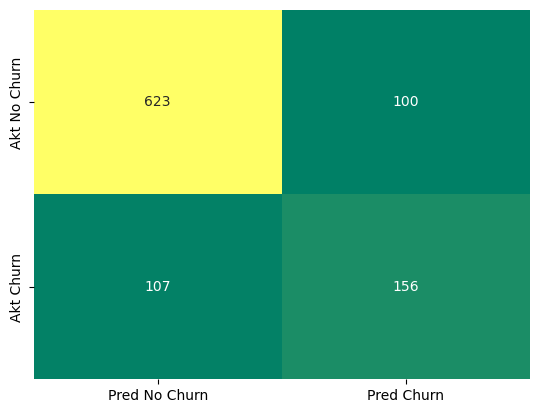

In [26]:
from sklearn.metrics import confusion_matrix

final_cm = confusion_matrix(Ytest, rf_predictions, labels=[0, 1])
df_final_cm = pd.DataFrame(data=final_cm, columns=['Pred No Churn', 'Pred Churn'], index=['Akt No Churn', 'Akt Churn'])
sns.heatmap(df_final_cm, cbar=False, annot=True, fmt='d', cmap='summer')

RandomForestClassifier memiliki Weighted F1 Score sebesar 0.7891, sementara AdaBoostClassifier mencapai 0.7922. Ini menunjukkan bahwa keduanya memiliki kinerja yang baik dalam memprediksi kelas dengan mempertimbangkan keseimbangan antara presisi dan recall. AdaBoostClassifier sedikit lebih unggul, memberikan nilai Weighted F1 Score yang sedikit lebih tinggi dibandingkan dengan RandomForestClassifier. Pemilihan model dapat disesuaikan dengan preferensi terhadap presisi atau recall, dan evaluasi ini memberikan wawasan untuk pemilihan model yang optimal dalam konteks tugas klasifikasi.

### Reccomendation

Untuk mengembangkan proyek dan meningkatkan kinerja model lebih lanjut, berikut beberapa rekomendasi:

- Hyperparameter Tuning pada Model RandomForestClassifier:
Lakukan penyetelan ulang hyperparameter pada model RandomForestClassifier. Pastikan untuk mengeksplorasi berbagai kombinasi seperti jumlah pohon (n_estimators), kedalaman maksimum pohon (max_depth), dan parameter lainnya untuk meningkatkan kinerja model ini.

- Hyperparameter Tuning pada Model AdaBoostClassifier:
Sama seperti pada RandomForestClassifier, lakukan penyetelan ulang hyperparameter pada model AdaBoostClassifier. Fokuskan pada parameter seperti learning rate dan jumlah estimator untuk memperoleh konfigurasi terbaik yang meningkatkan hasil model.

- Feature Selection Ulang:
Lakukan Feature Selection ulang untuk memastikan fitur yang digunakan oleh model adalah yang paling relevan dan memberikan kontribusi signifikan terhadap prediksi.

- Feature Engineering untuk Fitur Tenure dan Contract:
Terapkan metode encoding selain yang kami gunakan pada fitur Tenure dan Contract untuk meningkatkan representasi dan interpretasi model terhadap kedua fitur tersebut.

- Scaling pada Fitur MonthlyCharges:
Lakukan proses scaling pada fitur MonthlyCharges untuk memastikan setiap fitur memiliki skala yang seragam, mendukung model dalam menemukan pola yang lebih baik.

- Penambahan Fitur Baru:
Pertimbangkan menambahkan fitur baru, seperti kolom rating/kepuasan pelanggan pada 3 bulan pertama berlangganan, untuk memberikan informasi tambahan yang dapat meningkatkan kinerja model.

- Analisis Data Hasil Prediksi Salah:
Teliti data yang masih salah diprediksi oleh model untuk memahami karakteristiknya. Ini dapat memberikan wawasan yang berharga untuk penyempurnaan model.

- Dengan menerapkan rekomendasi ini, diharapkan dapat meningkatkan kinerja model secara signifikan dan memberikan hasil yang lebih baik daripada Weighted F1 Score sebelumnya untuk kedua model RandomForestClassifier dan AdaBoostClassifier.